In [1]:
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc
import pandas as pd
import matplotlib.pyplot as plt

# Create a Engine object 
engine = create_engine('sqlite:////home/sethrobinson/world.sqlite')

# Connect to the database
conn = engine.connect()

# Read the metadata from the existing database.
DBInfo=MetaData(engine)

In [2]:
### Question 1
##############

city=Table('city', DBInfo, autoload=True)
country=Table('country', DBInfo, autoload=True)

query=select([country.c.Name, country.c.IndepYear])\
             .order_by(desc(country.c.IndepYear))\
             .limit(2)
result = conn.execute(query)
for row in result:
    print(row)
print(result)

('Palau', 1994)
('Czech Republic', 1993)


In [3]:
### Question 2
##############


print(country.insert())

INSERT INTO country ("Code", "Name", "Continent", "Region", "SurfaceArea", "IndepYear", "Population", "LifeExpectancy", "GNP", "GNPOld", "LocalName", "GovernmentForm", "HeadOfState", "Capital", "Code2") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


In [4]:
my_insert=country.insert().values(Name = 'South Sudan', IndepYear = '2011')
print(my_insert)

conn=engine.connect()
conn

INSERT INTO country ("Name", "IndepYear") VALUES (?, ?)


In [5]:
result = conn.execute(my_insert)

In [6]:
query=select([country.c.Name, country.c.IndepYear]).where(country.c.Name.like('South%'))
result = conn.execute(query)
for row in result:
    print(row)

('South Korea', 1948)
('South Georgia and the South Sandwich Islands', None)
('South Africa', 1910)
('South Sudan', 2011)


In [7]:
### Question 3
##############

print(city.insert())

INSERT INTO city ("ID", "Name", "CountryCode", "District", "Population") VALUES (?, ?, ?, ?, ?)


In [8]:
my_insert=city.insert().values(Name='Wau',Population=232910)
print(my_insert)

INSERT INTO city ("Name", "Population") VALUES (?, ?)


In [9]:
result = conn.execute(my_insert)

In [10]:
query=select([city.c.Name, city.c.Population]).where(city.c.Name.like('Wau%'))
result = conn.execute(query)
for row in result:
    print(row)

('Wau', 232910)


In [11]:
my_insert=city.insert().values(Name='Malakal',Population=147450)
print(my_insert)

INSERT INTO city ("Name", "Population") VALUES (?, ?)


In [12]:
result = conn.execute(my_insert)

In [13]:
query=select([city.c.Name, city.c.Population]).where(city.c.Name.like('Malakal%'))
result = conn.execute(query)
for row in result:
    print(row)

('Malakal', 147450)


In [14]:
### Question 4
##############

# Select columns from country table
query=select([country.c.Name, country.c.SurfaceArea, country.c.Population, country.c.Continent, country.c.GNP, country.c.LifeExpectancy, country.c.IndepYear])
result = conn.execute(query)

df=pd.read_sql(query, conn)

Text(0, 0.5, 'Life Expectancy')

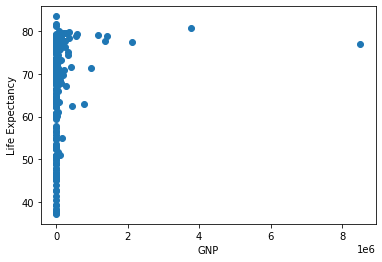

In [15]:
plt.scatter(df['GNP'], df['LifeExpectancy'], cmap='plasma')
plt.xlabel('GNP')
plt.ylabel('Life Expectancy')

In [16]:
query = select([city.c.Population])
result = conn.execute(query)

df2=pd.read_sql(query, conn)

In [17]:
df['Ratio'] = df2['Population']/df['Population']


df.head()

,Name,SurfaceArea,Population,Continent,GNP,LifeExpectancy,IndepYear,Ratio
0,Aruba,193.0,103000,North America,828.0,78.4,NaN,17.281553
1,Afghanistan,652090.0,22720000,Asia,5976.0,45.9,1919.0,0.010453
2,Angola,1246700.0,12878000,Africa,6648.0,38.3,1975.0,0.014505
3,Anguilla,96.0,8000,North America,63.2,76.1,NaN,15.975000
4,Albania,28748.0,3401200,Europe,3205.0,71.6,1912.0,0.174445


Text(0, 0.5, 'Life Expectancy')

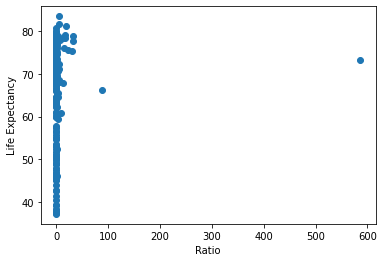

In [18]:
plt.scatter(df['Ratio'], df['LifeExpectancy'], cmap='plasma')
plt.xlabel('Ratio')
plt.ylabel('Life Expectancy')